# importing  libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dat
a 

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Step 3: Data Visualization 

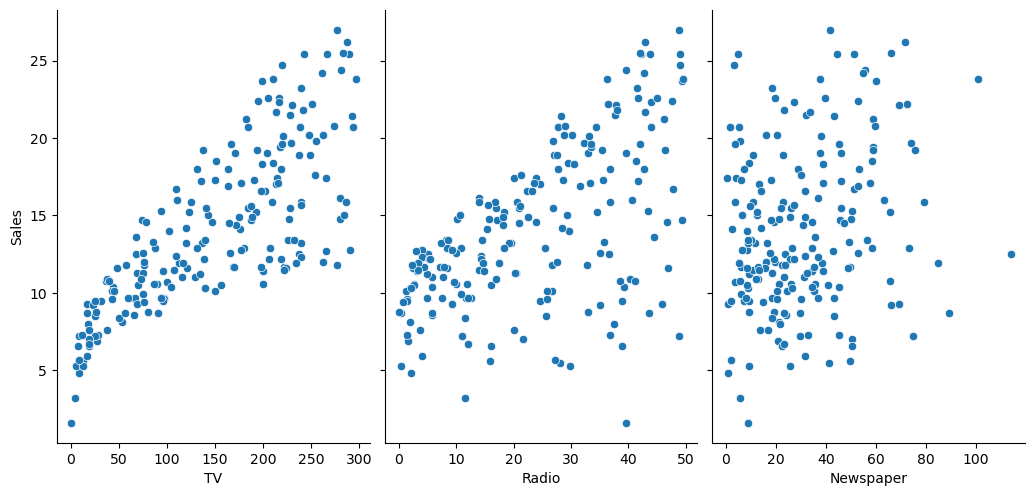

In [6]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7)
plt.show()

# Step 4: Prepare the data for training 

In [7]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Step 5: Standardize the features 

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split the data into training and testing sets 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Create and train the linear regression model 

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 8: Make predictions on the test set 

In [11]:
y_pred = model.predict(X_test)

# Step 9: Evaluate the model 

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.1740973539761064
R-squared: 0.8994380241009119


# Step 10: Visualization of Predicted vs. Actual Sales 

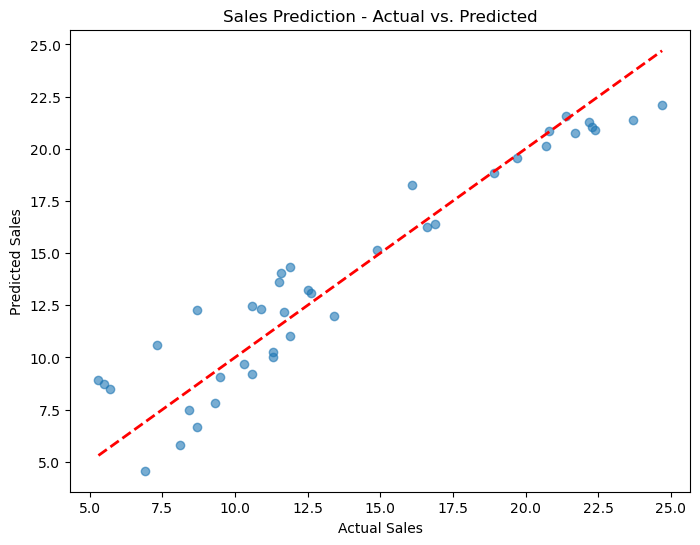

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Sales Prediction - Actual vs. Predicted")
plt.show()

# Step 11: Accuracy Plots 

## Step 11.1: Residual Plot 

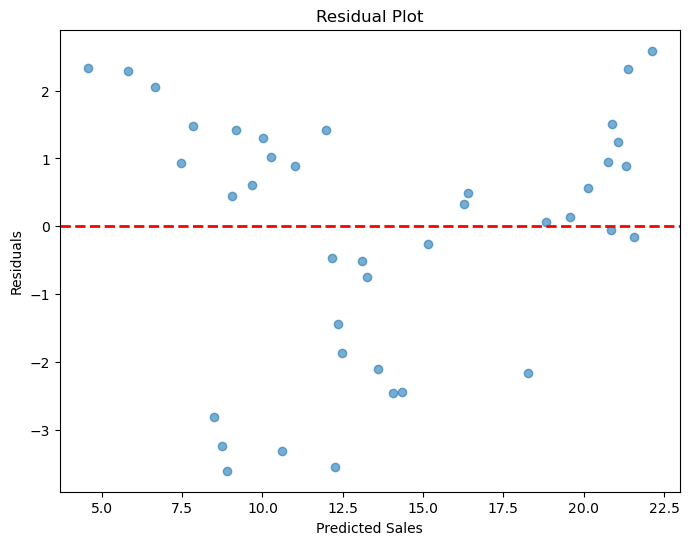

In [15]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## Step 11.2: Distribution of Errors 

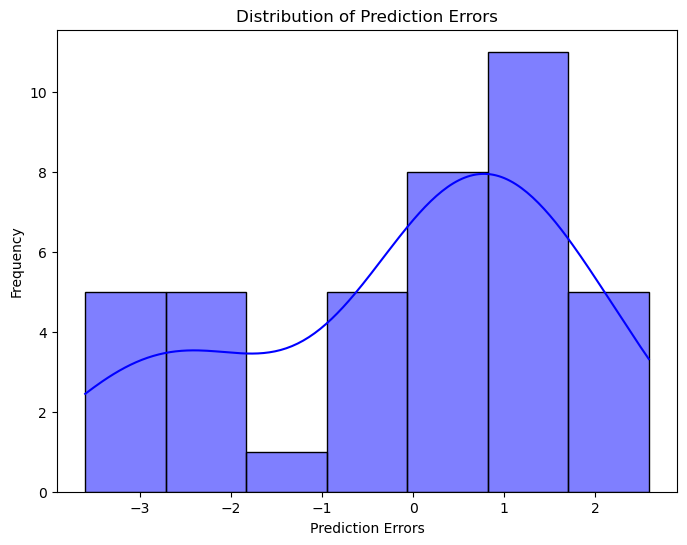

In [16]:
error_distribution = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(error_distribution, kde=True, color='blue')
plt.xlabel("Prediction Errors")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()